In [1]:
from __future__ import division
import os
import numpy as np
import random

In [2]:
from scipy import pi
from itertools import islice

In [3]:
folder = './driving_dataset/' # change this to your folder
trainfile = os.path.join(folder, 'data.txt')

In [4]:
split = 0.8

In [5]:
X = []
y = []

In [6]:
with open(trainfile) as fp:
    for line in islice(fp, 45567):
        path, angle = line.strip().split()
        full_path = os.path.join(folder, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )

In [7]:
y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.8)

train_y = y[:split_index]
test_y = y[split_index:]

Completed processing data.txt


In [8]:
len(train_y)

36324

In [9]:
len(test_y)

9082

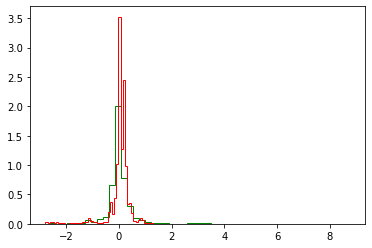

In [10]:
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, density=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, density=1, color='red', histtype ='step');
plt.show()

In [11]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )

Test_MSE(MEAN):0.191127
Test_MSE(ZERO):0.190891


In [12]:
import scipy.misc
import scipy
import random

In [13]:
xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0


In [14]:
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

In [15]:
len(xs)

45406

In [16]:
xs

['driving_dataset/0.jpg',
 'driving_dataset/1.jpg',
 'driving_dataset/2.jpg',
 'driving_dataset/3.jpg',
 'driving_dataset/4.jpg',
 'driving_dataset/5.jpg',
 'driving_dataset/6.jpg',
 'driving_dataset/7.jpg',
 'driving_dataset/8.jpg',
 'driving_dataset/9.jpg',
 'driving_dataset/10.jpg',
 'driving_dataset/11.jpg',
 'driving_dataset/12.jpg',
 'driving_dataset/13.jpg',
 'driving_dataset/14.jpg',
 'driving_dataset/15.jpg',
 'driving_dataset/16.jpg',
 'driving_dataset/17.jpg',
 'driving_dataset/18.jpg',
 'driving_dataset/19.jpg',
 'driving_dataset/20.jpg',
 'driving_dataset/21.jpg',
 'driving_dataset/22.jpg',
 'driving_dataset/23.jpg',
 'driving_dataset/24.jpg',
 'driving_dataset/25.jpg',
 'driving_dataset/26.jpg',
 'driving_dataset/27.jpg',
 'driving_dataset/28.jpg',
 'driving_dataset/29.jpg',
 'driving_dataset/30.jpg',
 'driving_dataset/31.jpg',
 'driving_dataset/32.jpg',
 'driving_dataset/33.jpg',
 'driving_dataset/34.jpg',
 'driving_dataset/35.jpg',
 'driving_dataset/36.jpg',
 'driving_d

In [17]:
ys

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.20420352248333654,
 0.20420352248333654,
 0.18133970928221083,
 0.16196655458507378,
 0.1530653753999027,
 0.12322024519079966,
 0.06859143960337716,
 0.01937315469713706,
 0.014137166941154071,
 0.0158824961931484,
 0.0,
 0.014137166941154071,
 0.012391837689159739,
 0.012391837689159739,
 0.021118483949131385,
 0.021118483949131385,
 0.021118483949131385,
 0.021118483949131385,
 0.021118483949131385,
 -0.0017453292519943296,
 0.0,
 0.0,
 -0.024609142453120045,
 -0.03874630939427412,
 -0.035255650890285456,
 -0.024609142453120045,
 -0.021118483949131385,
 -0.0158824961931484,
 -0.014137166941154071,
 -0.014137166941154071,
 -0.012391837689159739,
 -0.006981317007977318,
 -0.0017453292519943296,
 0.0017453292519943296,
 0.005235987755982988,
 0.006981317007977318,
 0.01064650843716541,
 0.0158824961931484,
 0.026354471705114374,
 0.037000980142279

In [18]:
num_images = len(xs)


train_xs = xs[:int(len(xs) * 0.8)]
train_ys = ys[:int(len(xs) * 0.8)]

val_xs = xs[-int(len(xs) * 0.2):]
val_ys = ys[-int(len(xs) * 0.2):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [19]:
import scipy.misc
import imageio
from skimage.transform import resize

In [20]:
image_read = imageio.imread(train_xs[0])
print("original image size",image_read.shape)

print("After taking the last 150 rows i.e lower part of the images where road is present, ",image_read[-150:].shape)
image_read = image_read[-150:]
resized_image = resize(image_read, [66, 200])
print("After resizing the images into 66*200, ",resized_image.shape)

original image size (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
After resizing the images into 66*200,  (66, 200, 3)


In [24]:
import tensorflow as tf
import scipy
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, stride):
  return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.multiply(tf.atan(tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2) #scale the atan output

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
import os
import tensorflow as tf
from tensorflow.core.protobuf import saver_pb2

In [37]:
LOGDIR = './save'
sess = tf.compat.v1.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.compat.v1.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(y_, y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst

In [43]:
# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.compat.v1.summary.merge_all()

saver = tf.compat.v1.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.compat.v1.summary.FileWriter(logs_path, graph=tf.compat.v1.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times